In [1]:
import numpy as np
from numpy.random import random

In [2]:
# positions go from 0 to 1

def throw_balls(pos, N_balls):
    ball_positions = sorted(random(size=N_balls))
    i = np.searchsorted(ball_positions, pos)
    return(i, N_balls-i)

In [3]:
def estimate(N_left, N_right, statistics):
    if(statistics == 'bayes'):
        return((N_left+1)/(N_left+N_right+2))
    elif(statistics == 'frequentist'):
        return(N_left/(N_left+N_right))

In [4]:
def trial(N_tests, N_balls):
    eb = []
    ef = []
    for _ in range(N_tests):
        position = random()
        N_left, N_right = throw_balls(position, N_balls)
        bayes = estimate(N_left, N_right, 'bayes')        
        frequentist = estimate(N_left, N_right, 'frequentist')
        eb.append(bayes - position)
        ef.append(frequentist - position)
    return(eb, ef)

In [14]:
b, f = trial(10000, 200)

Text(0, 0.5, 'Probability density')

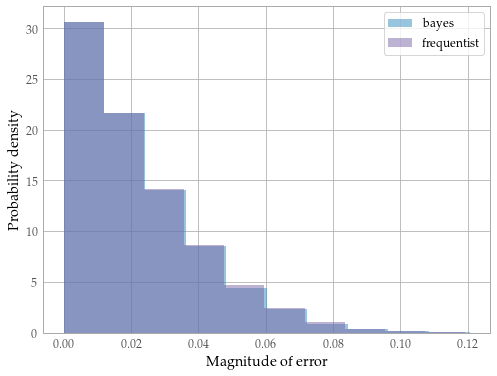

In [15]:
for x, name in ((b, 'bayes'), (f, 'frequentist')):
    plt.hist(np.abs(x), alpha = .5, label=name, density=True)
plt.legend()
plt.xlabel('Magnitude of error')
plt.ylabel('Probability density')